In [28]:
from numpy import *
import math
import matplotlib.pyplot as plt

In [3]:
def loadSimpleData():
    dataMat = matrix([[1.0, 2.1], [2., 1.1], [1.3, 1.], [1., 1.], [2., 1.]])
    classLabels = [1.0, 1.0, -1.0, -1.0, 1.0]
    return dataMat, classLabels

In [9]:
datMat, classLabels = loadSimpleData()

In [6]:
def stumpClassify(dataMatrix, dimen, threshVal, threshInEq):
    retArray = ones((shape(dataMatrix)[0], 1))
    if threshInEq == 'lt':
        retArray[dataMatrix[:,dimen] <= threshVal] = -1.0
    else:
        retArray[dataMatrix[:,dimen] > threshVal] = -1.0
    return retArray

In [11]:
def buildStump(dataArr, classLabels, D):
    dataMatrix = mat(dataArr)
    labelMat = mat(classLabels).T
    m, n = shape(dataMatrix)
    numSteps = 10.0
    bestStump = {}
    bestClassEst = mat(zeros((m, 1)))
    minError = inf
    for i in range(n):
        rangeMin = dataMatrix[:, i].min()
        rangeMax = dataMatrix[:, i].max()
        stepSize = (rangeMax - rangeMin)/numSteps
        for j in range(-1, int(numSteps)+1):
            for inequal in ['lt', 'gt']:
                threshVal = (rangeMin+float(j)*stepSize)
                predictedVals = stumpClassify(dataMatrix, i, threshVal, inequal)
                errArr = mat(ones((m, 1)))
                errArr[predictedVals==labelMat] = 0
                weightedError = D.T * errArr
                print(f'Split: dim{i}, thresh: {threshVal}, threshInEqual:{inequal}, the weighted Error is {weightedError}')
                if weightedError < minError:
                    minError = weightedError
                    bestClassEst = predictedVals.copy()
                    bestStump['dim'] = i
                    bestStump['thresh'] = threshVal
                    bestStump['ineq'] = inequal
    return bestStump, minError, bestClassEst

In [12]:
D = mat(ones((5,1))/5)
buildStump(datMat, classLabels, D)

Split: dim0, thresh: 0.9, threshInEqual:lt, the weighted Error is [[0.4]]
Split: dim0, thresh: 0.9, threshInEqual:gt, the weighted Error is [[0.6]]
Split: dim0, thresh: 1.0, threshInEqual:lt, the weighted Error is [[0.4]]
Split: dim0, thresh: 1.0, threshInEqual:gt, the weighted Error is [[0.6]]
Split: dim0, thresh: 1.1, threshInEqual:lt, the weighted Error is [[0.4]]
Split: dim0, thresh: 1.1, threshInEqual:gt, the weighted Error is [[0.6]]
Split: dim0, thresh: 1.2, threshInEqual:lt, the weighted Error is [[0.4]]
Split: dim0, thresh: 1.2, threshInEqual:gt, the weighted Error is [[0.6]]
Split: dim0, thresh: 1.3, threshInEqual:lt, the weighted Error is [[0.2]]
Split: dim0, thresh: 1.3, threshInEqual:gt, the weighted Error is [[0.8]]
Split: dim0, thresh: 1.4, threshInEqual:lt, the weighted Error is [[0.2]]
Split: dim0, thresh: 1.4, threshInEqual:gt, the weighted Error is [[0.8]]
Split: dim0, thresh: 1.5, threshInEqual:lt, the weighted Error is [[0.2]]
Split: dim0, thresh: 1.5, threshInEqua

({'dim': 0, 'thresh': 1.3, 'ineq': 'lt'},
 matrix([[0.2]]),
 array([[-1.],
        [ 1.],
        [-1.],
        [-1.],
        [ 1.]]))

In [31]:
def adaBoostTrainDs(dataArr, classLabels, numIt=40):
    weekClassArr = []
    m = shape(dataArr)[0]
    D = mat(ones((m, 1))/m)
    aggClassEst = mat(zeros((m, 1)))
    for i in range(numIt):
        bestStump, error, classEst = buildStump(dataArr, classLabels, D)
        print(f'D:{D.T}')
        alpha = float(0.5 * log((1.0-error)/max(error, 1e-16)))
        bestStump['alpha'] = alpha
        weekClassArr.append(bestStump)
        print(f'class Est: {classEst.T}')
        expon = multiply(-1 * alpha * mat(classLabels).T, classEst)
        D = multiply(D, exp(expon))
        D = D/D.sum()
        aggClassEst += alpha * classEst
        print(f'aggClassEst:{aggClassEst.T}')
        aggErrors = multiply(sign(aggClassEst) != mat(classLabels).T, ones((m, 1)))
        errorRate = aggErrors.sum()/m
        print(f'Total Error: {errorRate}\n')
        if errorRate == 0.0:
            break
    return weekClassArr, aggClassEst

In [18]:
classifierArray = adaBoostTrainDs(datMat, classLabels, 9)

Split: dim0, thresh: 0.9, threshInEqual:lt, the weighted Error is [[0.4]]
Split: dim0, thresh: 0.9, threshInEqual:gt, the weighted Error is [[0.6]]
Split: dim0, thresh: 1.0, threshInEqual:lt, the weighted Error is [[0.4]]
Split: dim0, thresh: 1.0, threshInEqual:gt, the weighted Error is [[0.6]]
Split: dim0, thresh: 1.1, threshInEqual:lt, the weighted Error is [[0.4]]
Split: dim0, thresh: 1.1, threshInEqual:gt, the weighted Error is [[0.6]]
Split: dim0, thresh: 1.2, threshInEqual:lt, the weighted Error is [[0.4]]
Split: dim0, thresh: 1.2, threshInEqual:gt, the weighted Error is [[0.6]]
Split: dim0, thresh: 1.3, threshInEqual:lt, the weighted Error is [[0.2]]
Split: dim0, thresh: 1.3, threshInEqual:gt, the weighted Error is [[0.8]]
Split: dim0, thresh: 1.4, threshInEqual:lt, the weighted Error is [[0.2]]
Split: dim0, thresh: 1.4, threshInEqual:gt, the weighted Error is [[0.8]]
Split: dim0, thresh: 1.5, threshInEqual:lt, the weighted Error is [[0.2]]
Split: dim0, thresh: 1.5, threshInEqua

C:\Users\harsh\AppData\Local\Temp\ipykernel_11008\1669607601.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha = float(0.5 * log((1.0-error)/max(error, 1e-16)))


In [19]:
classifierArray

[{'dim': 0, 'thresh': 1.3, 'ineq': 'lt', 'alpha': 0.6931471805599453},
 {'dim': 1, 'thresh': 1.0, 'ineq': 'lt', 'alpha': 0.9729550745276565},
 {'dim': 0, 'thresh': 0.9, 'ineq': 'lt', 'alpha': 0.8958797346140273}]

In [20]:
def adaClassify(datToClass, classifierArr):
    dataMatrix = mat(datToClass)
    m = shape(dataMatrix)[0]
    aggClassEst = mat(zeros((m,1)))
    for i in range(len(classifierArr)):
        classEst = stumpClassify(dataMatrix, classifierArr[i]['dim'], classifierArr[i]['thresh'], classifierArr[i]['ineq'])
        aggClassEst += classifierArr[i]['alpha'] * classEst
        print(f'AggclassEst: {aggClassEst}')
    return sign(aggClassEst)


In [21]:
datArr, labelArr = loadSimpleData()
classifierArr = adaBoostTrainDs(datArr, labelArr, 30)

Split: dim0, thresh: 0.9, threshInEqual:lt, the weighted Error is [[0.4]]
Split: dim0, thresh: 0.9, threshInEqual:gt, the weighted Error is [[0.6]]
Split: dim0, thresh: 1.0, threshInEqual:lt, the weighted Error is [[0.4]]
Split: dim0, thresh: 1.0, threshInEqual:gt, the weighted Error is [[0.6]]
Split: dim0, thresh: 1.1, threshInEqual:lt, the weighted Error is [[0.4]]
Split: dim0, thresh: 1.1, threshInEqual:gt, the weighted Error is [[0.6]]
Split: dim0, thresh: 1.2, threshInEqual:lt, the weighted Error is [[0.4]]
Split: dim0, thresh: 1.2, threshInEqual:gt, the weighted Error is [[0.6]]
Split: dim0, thresh: 1.3, threshInEqual:lt, the weighted Error is [[0.2]]
Split: dim0, thresh: 1.3, threshInEqual:gt, the weighted Error is [[0.8]]
Split: dim0, thresh: 1.4, threshInEqual:lt, the weighted Error is [[0.2]]
Split: dim0, thresh: 1.4, threshInEqual:gt, the weighted Error is [[0.8]]
Split: dim0, thresh: 1.5, threshInEqual:lt, the weighted Error is [[0.2]]
Split: dim0, thresh: 1.5, threshInEqua

C:\Users\harsh\AppData\Local\Temp\ipykernel_11008\1669607601.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha = float(0.5 * log((1.0-error)/max(error, 1e-16)))


In [22]:
adaClassify([0, 0], classifierArr)

AggclassEst: [[-0.69314718]]
AggclassEst: [[-1.66610226]]
AggclassEst: [[-2.56198199]]


matrix([[-1.]])

In [23]:
def loadDataSet(fileName):
    numFeat = len(open(fileName).readline().split('\t'))
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat - 1):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat, labelMat

In [24]:
dataArr, labelArr = loadDataSet('horseColicTraining2.txt')
classifierArray = adaBoostTrainDs(dataArr, labelArr, 10)

Split: dim0, thresh: 0.9, threshInEqual:lt, the weighted Error is [[0.40468227]]
Split: dim0, thresh: 0.9, threshInEqual:gt, the weighted Error is [[0.59531773]]
Split: dim0, thresh: 1.0, threshInEqual:lt, the weighted Error is [[0.43812709]]
Split: dim0, thresh: 1.0, threshInEqual:gt, the weighted Error is [[0.56187291]]
Split: dim0, thresh: 1.1, threshInEqual:lt, the weighted Error is [[0.43812709]]
Split: dim0, thresh: 1.1, threshInEqual:gt, the weighted Error is [[0.56187291]]
Split: dim0, thresh: 1.2, threshInEqual:lt, the weighted Error is [[0.43812709]]
Split: dim0, thresh: 1.2, threshInEqual:gt, the weighted Error is [[0.56187291]]
Split: dim0, thresh: 1.3, threshInEqual:lt, the weighted Error is [[0.43812709]]
Split: dim0, thresh: 1.3, threshInEqual:gt, the weighted Error is [[0.56187291]]
Split: dim0, thresh: 1.4, threshInEqual:lt, the weighted Error is [[0.43812709]]
Split: dim0, thresh: 1.4, threshInEqual:gt, the weighted Error is [[0.56187291]]
Split: dim0, thresh: 1.5, th

C:\Users\harsh\AppData\Local\Temp\ipykernel_11008\1669607601.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha = float(0.5 * log((1.0-error)/max(error, 1e-16)))


Split: dim17, thresh: 37.5, threshInEqual:gt, the weighted Error is [[0.51341372]]
Split: dim17, thresh: 45.0, threshInEqual:lt, the weighted Error is [[0.49490778]]
Split: dim17, thresh: 45.0, threshInEqual:gt, the weighted Error is [[0.50509222]]
Split: dim17, thresh: 52.5, threshInEqual:lt, the weighted Error is [[0.49597366]]
Split: dim17, thresh: 52.5, threshInEqual:gt, the weighted Error is [[0.50402634]]
Split: dim17, thresh: 60.0, threshInEqual:lt, the weighted Error is [[0.48838641]]
Split: dim17, thresh: 60.0, threshInEqual:gt, the weighted Error is [[0.51161359]]
Split: dim17, thresh: 67.5, threshInEqual:lt, the weighted Error is [[0.46210489]]
Split: dim17, thresh: 67.5, threshInEqual:gt, the weighted Error is [[0.53789511]]
Split: dim17, thresh: 75.0, threshInEqual:lt, the weighted Error is [[0.44672952]]
Split: dim17, thresh: 75.0, threshInEqual:gt, the weighted Error is [[0.55327048]]
Split: dim18, thresh: -8.9, threshInEqual:lt, the weighted Error is [[0.55327048]]
Spli

In [25]:
classifierArray

[{'dim': 9, 'thresh': 3.0, 'ineq': 'gt', 'alpha': 0.4616623792657674},
 {'dim': 17, 'thresh': 52.5, 'ineq': 'gt', 'alpha': 0.31248245042467104},
 {'dim': 3,
  'thresh': 55.199999999999996,
  'ineq': 'gt',
  'alpha': 0.28680973201695786},
 {'dim': 18,
  'thresh': 62.300000000000004,
  'ineq': 'lt',
  'alpha': 0.23297004638939492},
 {'dim': 10, 'thresh': 0.0, 'ineq': 'lt', 'alpha': 0.19803846151213736},
 {'dim': 5, 'thresh': 2.0, 'ineq': 'gt', 'alpha': 0.18847887349020628},
 {'dim': 12, 'thresh': 1.2, 'ineq': 'lt', 'alpha': 0.1522736899747682},
 {'dim': 7, 'thresh': 1.2, 'ineq': 'gt', 'alpha': 0.15510870821690512},
 {'dim': 5, 'thresh': 0.0, 'ineq': 'lt', 'alpha': 0.1353619735335938},
 {'dim': 4,
  'thresh': 28.799999999999997,
  'ineq': 'lt',
  'alpha': 0.12521587326132094}]

In [26]:
testArr, testLabelArr = loadDataSet('horseColicTest2.txt')
prediction10 = adaClassify(testArr, classifierArray)

AggclassEst: [[ 0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [-0.46166238]
 [-0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.4616623

In [27]:
errArr = mat(ones((67, 1)))
errArr[prediction10 != mat(testLabelArr).T].sum()

16.0

In [30]:
def plotROC(predStrengts, classLabels):
    cur = (1.0, 1.0)
    ySum = 0.0
    numPosClass = sum(array(classLabels) == 1.0)
    yStep = 1/float(numPosClass)
    xStep = 1/float(len(classLabels) - numPosClass)
    sortedIndecies = predStrengts.argsort()
    fig = plt.figure()
    fig.clf()
    ax = plt.subplot(111)
    for index in sortedIndecies.tolist()[0]:
        if classLabels[index] == 1.0:
            delX = 0
            delY = yStep
        else:
            delX = xStep
            delY = 0
            ySum += cur[1]
        ax.plot([cur[0], cur[0]-delX],[cur[1], cur[1]-delY], c='b')
        cur = (cur[0]-delX, cur[1]-delY)
    ax.plot([0, 1], [0, 1], 'b--')
    plt.xlabel('False Positive rate')
    plt.ylabel('True positive Rate')
    plt.title('ROC Curve fot ADA-Boost Horse Colic detection system')
    ax.axis([0, 1, 0, 1])
    plt.show()
    print(f'The area under the curve is {ySum*xStep}')



Split: dim0, thresh: 0.9, threshInEqual:lt, the weighted Error is [[0.40468227]]
Split: dim0, thresh: 0.9, threshInEqual:gt, the weighted Error is [[0.59531773]]
Split: dim0, thresh: 1.0, threshInEqual:lt, the weighted Error is [[0.43812709]]
Split: dim0, thresh: 1.0, threshInEqual:gt, the weighted Error is [[0.56187291]]
Split: dim0, thresh: 1.1, threshInEqual:lt, the weighted Error is [[0.43812709]]
Split: dim0, thresh: 1.1, threshInEqual:gt, the weighted Error is [[0.56187291]]
Split: dim0, thresh: 1.2, threshInEqual:lt, the weighted Error is [[0.43812709]]
Split: dim0, thresh: 1.2, threshInEqual:gt, the weighted Error is [[0.56187291]]
Split: dim0, thresh: 1.3, threshInEqual:lt, the weighted Error is [[0.43812709]]
Split: dim0, thresh: 1.3, threshInEqual:gt, the weighted Error is [[0.56187291]]
Split: dim0, thresh: 1.4, threshInEqual:lt, the weighted Error is [[0.43812709]]
Split: dim0, thresh: 1.4, threshInEqual:gt, the weighted Error is [[0.56187291]]
Split: dim0, thresh: 1.5, th

C:\Users\harsh\AppData\Local\Temp\ipykernel_11008\2990817398.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha = float(0.5 * log((1.0-error)/max(error, 1e-16)))


Split: dim0, thresh: 0.9, threshInEqual:gt, the weighted Error is [[0.44672952]]
Split: dim0, thresh: 1.0, threshInEqual:lt, the weighted Error is [[0.45158229]]
Split: dim0, thresh: 1.0, threshInEqual:gt, the weighted Error is [[0.54841771]]
Split: dim0, thresh: 1.1, threshInEqual:lt, the weighted Error is [[0.45158229]]
Split: dim0, thresh: 1.1, threshInEqual:gt, the weighted Error is [[0.54841771]]
Split: dim0, thresh: 1.2, threshInEqual:lt, the weighted Error is [[0.45158229]]
Split: dim0, thresh: 1.2, threshInEqual:gt, the weighted Error is [[0.54841771]]
Split: dim0, thresh: 1.3, threshInEqual:lt, the weighted Error is [[0.45158229]]
Split: dim0, thresh: 1.3, threshInEqual:gt, the weighted Error is [[0.54841771]]
Split: dim0, thresh: 1.4, threshInEqual:lt, the weighted Error is [[0.45158229]]
Split: dim0, thresh: 1.4, threshInEqual:gt, the weighted Error is [[0.54841771]]
Split: dim0, thresh: 1.5, threshInEqual:lt, the weighted Error is [[0.45158229]]
Split: dim0, thresh: 1.5, th

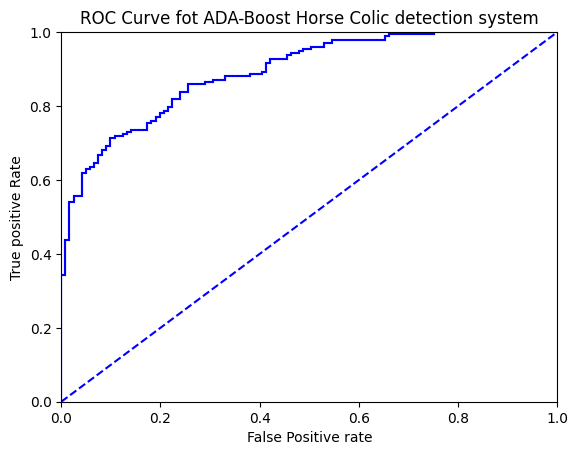

The area under the curve is 0.8918191104095092


In [33]:
datArr, labelArr = loadDataSet('horseColicTraining2.txt')
classifierArray, aggclassEst = adaBoostTrainDs(datArr, labelArr, 40)
plotROC(aggclassEst.T, labelArr)